# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [4]:
model = smf.ols(formula='tip_pct ~ net_bill', data=tips)
results = model.fit()

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


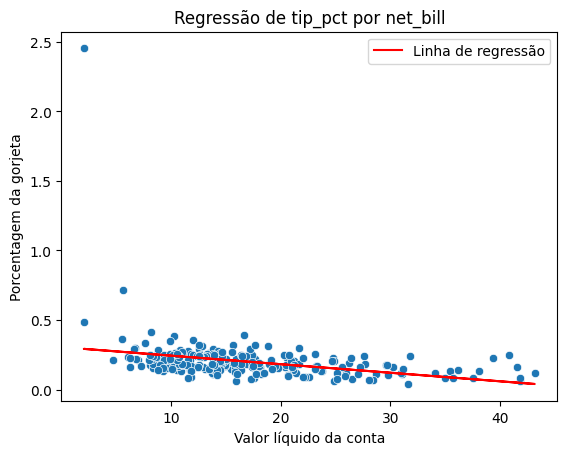

In [5]:
# Gráfico de dispersão com a linha de regressão ajustada
sns.scatterplot(x='net_bill', y='tip_pct', data=tips)
plt.plot(tips['net_bill'], results.fittedvalues, color='red', label='Linha de regressão')
plt.xlabel('Valor líquido da conta')
plt.ylabel('Porcentagem da gorjeta')
plt.title('Regressão de tip_pct por net_bill')
plt.legend()
plt.show()

In [6]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           1.52e-06
Time:                        11:18:51   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


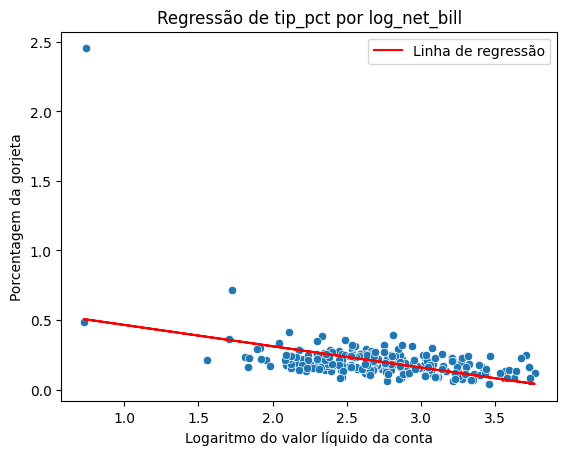

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           1.62e-13
Time:                        11:18:51   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6181      0.054     11.444   

In [7]:
import numpy as np

# Transformando net_bill usando logaritmo natural
tips['log_net_bill'] = np.log(tips['net_bill'])

# Ajustando o modelo de regressão linear com a variável transformada
model = smf.ols(formula='tip_pct ~ log_net_bill', data=tips)
results1 = model.fit()

# Gráfico de dispersão com a linha de regressão ajustada
sns.scatterplot(x='log_net_bill', y='tip_pct', data=tips)
plt.plot(tips['log_net_bill'], results1.fittedvalues, color='red', label='Linha de regressão')
plt.xlabel('Logaritmo do valor líquido da conta')
plt.ylabel('Porcentagem da gorjeta')
plt.title('Regressão de tip_pct por log_net_bill')
plt.legend()
plt.show()

print(results1.summary())

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


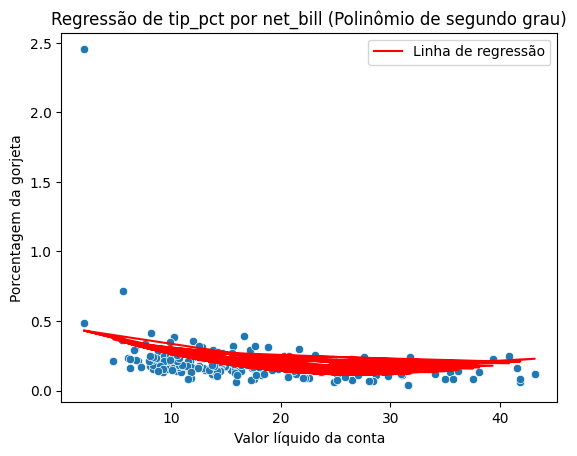

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           1.06e-09
Time:                        11:18:51   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4851      0.047  

In [8]:
import numpy as np

# Adicionando a coluna de net_bill ao quadrado
tips['net_bill_squared'] = tips['net_bill'] ** 2

# Ajustando o modelo de regressão polinomial de segundo grau
model = smf.ols(formula='tip_pct ~ net_bill + net_bill_squared', data=tips)
results2 = model.fit()

# Gráfico de dispersão com a linha de regressão ajustada
sns.scatterplot(x='net_bill', y='tip_pct', data=tips)
plt.plot(tips['net_bill'], results2.fittedvalues, color='red', label='Linha de regressão')
plt.xlabel('Valor líquido da conta')
plt.ylabel('Porcentagem da gorjeta')
plt.title('Regressão de tip_pct por net_bill (Polinômio de segundo grau)')
plt.legend()
plt.show()

print(results2.summary())

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

R² em relação a tip_pct: 0.23534487140864324


c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


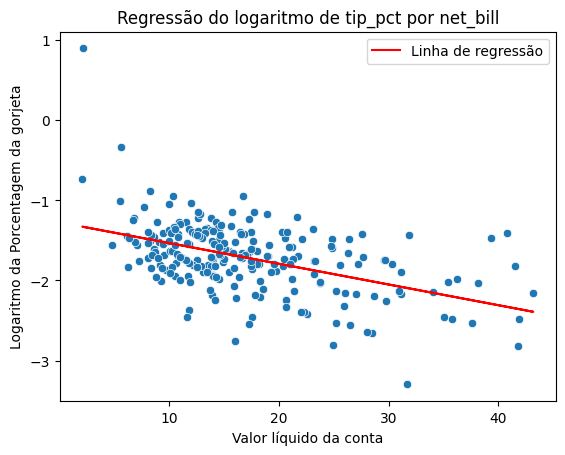

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           8.27e-16
Time:                        11:18:52   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

In [9]:
import numpy as np

# Calculando o logaritmo de tip_pct
tips['log_tip_pct'] = np.log(tips['tip_pct'])

# Ajustando o modelo de regressão linear
model = smf.ols(formula='log_tip_pct ~ net_bill', data=tips)
results3 = model.fit()

# Calculando o R² em relação a tip_pct
rsquared_tip_pct = results3.rsquared

# Imprimindo o R² em tip_pct
print("R² em relação a tip_pct:", rsquared_tip_pct)

# Gráfico de dispersão com a linha de regressão ajustada
sns.scatterplot(x='net_bill', y='log_tip_pct', data=tips)
plt.plot(tips['net_bill'], results3.fittedvalues, color='red', label='Linha de regressão')
plt.xlabel('Valor líquido da conta')
plt.ylabel('Logaritmo da Porcentagem da gorjeta')
plt.title('Regressão do logaritmo de tip_pct por net_bill')
plt.legend()
plt.show()

print(results3.summary())

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

R² em relação a tip_pct: 0.2934740215080778


c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


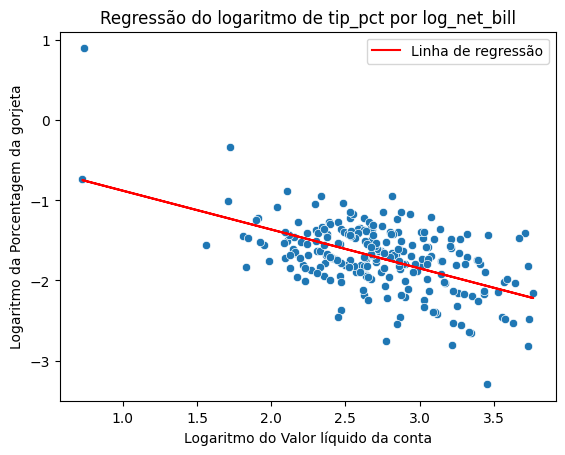

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           5.20e-20
Time:                        11:18:52   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3942      0.133     -2.961   

In [10]:
import numpy as np

# Calculando o logaritmo de tip_pct e de net_bill
tips['log_tip_pct'] = np.log(tips['tip_pct'])
tips['log_net_bill'] = np.log(tips['net_bill'])

# Ajustando o modelo de regressão linear
model = smf.ols(formula='log_tip_pct ~ log_net_bill', data=tips)
results4 = model.fit()

# Calculando o R² em relação a tip_pct
rsquared_tip_pct = results4.rsquared

# Imprimindo o R² em tip_pct
print("R² em relação a tip_pct:", rsquared_tip_pct)

# Gráfico de dispersão com a linha de regressão ajustada
sns.scatterplot(x='log_net_bill', y='log_tip_pct', data=tips)
plt.plot(tips['log_net_bill'], results4.fittedvalues, color='red', label='Linha de regressão')
plt.xlabel('Logaritmo do Valor líquido da conta')
plt.ylabel('Logaritmo da Porcentagem da gorjeta')
plt.title('Regressão do logaritmo de tip_pct por log_net_bill')
plt.legend()
plt.show()

print(results4.summary())

###  6. qual modelo resultou no melhor ajuste?

O melhor modelo é o de ```tip_pct``` em função do log de ```net_bill```.

In [11]:
# Stampa i valori di R-squared per i tre modelli
print("Modello 1 (log_tip_pct ~ net_bill):", results1.rsquared)
print("Modello 2 (polinomio di secondo grado in net_bill):", results2.rsquared)
print("Modello 3 (tip_pct ~ net_bill):", results3.rsquared)


Modello 1 (log_tip_pct ~ net_bill): 0.20172884237605493
Modello 2 (polinomio di secondo grado in net_bill): 0.15760784734296185
Modello 3 (tip_pct ~ net_bill): 0.23534487140864324
